In [35]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 9.8/9.8 MB 51.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   --------- ------------------------------ 9.4/41.0 MB 45.3 MB/s eta 0:00:01
   ------------------ --------------------- 18.9/41.0 MB 46.1 MB/s eta 0:00:01
   --------------------------- ------------ 28.6/41.0 MB 46.8 MB/s eta 0:00:01
   -------------------------------------- - 39.3/41.0 MB 48.3 MB/s eta 0:00:01
   ---------------------------------------- 41.0/41.0 MB 44.7 MB/s eta 0:00:00

   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scip

In [100]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller            
from statsmodels.tsa.seasonal import STL  
from statsmodels.tsa.stattools import kpss

In [87]:
tech = ['hydro', 'biomass', 'solar', 'wind']

data = {}

for i in tech:
    data[i] = pd.read_csv(f'data/{i}.csv', parse_dates=['Modified on'])

data['hydro']

,Modified on,Product code,Bid,Ask,Mid price,Currency
0,2020-06-19 11:18:50+02:00,GO HYDRO EU 2024,0.40,0.50,0.450,EUR
1,2020-06-19 11:21:12+02:00,GO HYDRO EU 2024,0.44,0.50,0.470,EUR
2,2020-06-19 11:21:15+02:00,GO HYDRO EU 2024,0.44,0.49,0.465,EUR
3,2020-06-22 08:32:00+02:00,GO HYDRO EU 2024,0.44,0.49,0.465,EUR
4,2020-06-22 08:32:00+02:00,GO HYDRO EU 2024,0.44,0.49,0.465,EUR
...,...,...,...,...,...,...
14180,2025-06-02 08:46:52+02:00,GO HYDRO EU 2028,1.20,1.25,1.225,EUR
14181,2025-06-02 08:46:52+02:00,GO HYDRO EU 2028,1.20,1.25,1.225,EUR
14182,2025-06-02 08:57:47+02:00,GO HYDRO EU 2028,1.20,1.25,1.225,EUR
14183,2025-06-02 09:00:03+02:00,GO HYDRO EU 2028,1.20,1.25,1.225,EUR


In [88]:
for tech_type, df in data.items():
    for year in df['Product code'].unique():
        subset = df[df['Product code'] == year].copy()
        subset.sort_values(by='Modified on', inplace=True)

        #log
        for col in ['Bid', 'Ask', 'Mid price']:
            subset[f'{col.lower()}_log_diff'] = np.log(subset[col]).diff()
 
            split_data[(tech_type, year)] = subset

split_data

C:\Users\esurujiu\AppData\Local\miniconda3\envs\GOs\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


{('hydro',
  'GO HYDRO EU 2024'):                     Modified on      Product code   Bid   Ask  Mid price  \
 0     2020-06-19 11:18:50+02:00  GO HYDRO EU 2024  0.40  0.50      0.450   
 1     2020-06-19 11:21:12+02:00  GO HYDRO EU 2024  0.44  0.50      0.470   
 2     2020-06-19 11:21:15+02:00  GO HYDRO EU 2024  0.44  0.49      0.465   
 3     2020-06-22 08:32:00+02:00  GO HYDRO EU 2024  0.44  0.49      0.465   
 4     2020-06-22 08:32:00+02:00  GO HYDRO EU 2024  0.44  0.49      0.465   
 ...                         ...               ...   ...   ...        ...   
 3749  2025-06-02 08:59:47+02:00  GO HYDRO EU 2024  0.07  0.12      0.095   
 3750  2025-06-02 09:30:29+02:00  GO HYDRO EU 2024  0.07  0.12      0.095   
 3751  2025-06-02 09:43:25+02:00  GO HYDRO EU 2024  0.07  0.12      0.095   
 3752  2025-06-02 09:50:22+02:00  GO HYDRO EU 2024  0.07  0.12      0.095   
 3753  2025-06-02 15:45:08+02:00  GO HYDRO EU 2024  0.07  0.12      0.095   
 
      Currency  bid_log_diff  ask_log_dif

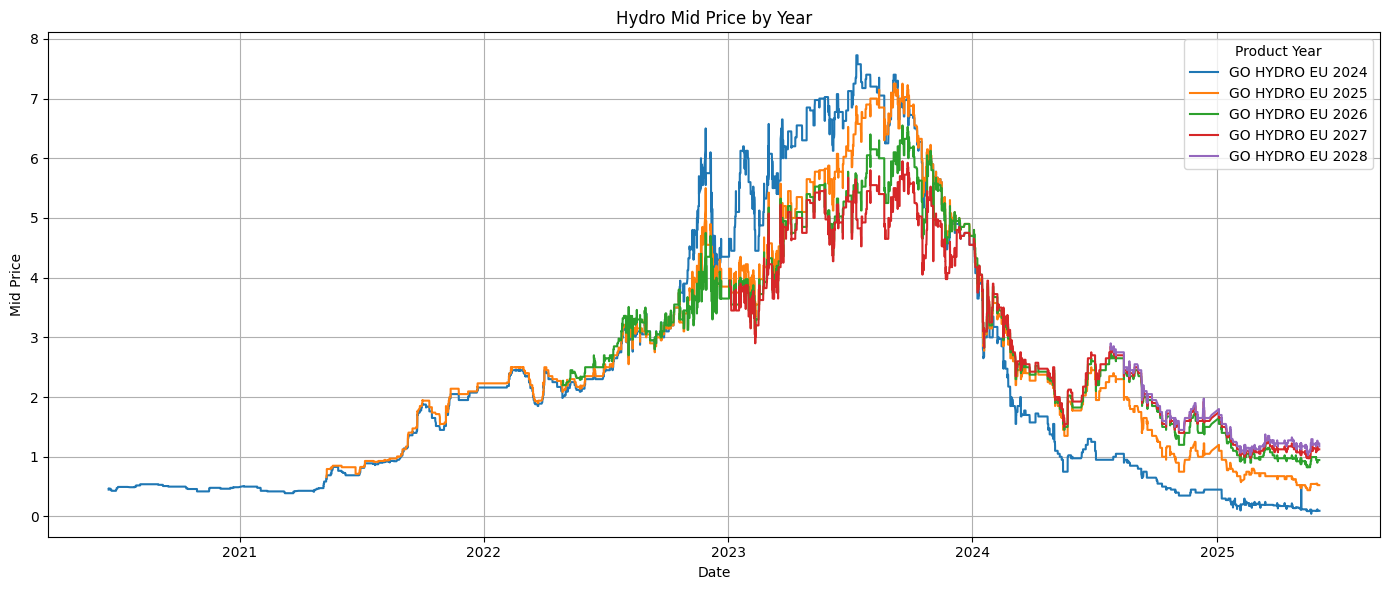

In [89]:
plt.figure(figsize=(14, 6))


for (tech_type, year), df in split_data.items():
    if tech_type == 'hydro':
        plt.plot(df['Modified on'], df['Mid price'], label=str(year))

plt.title('Hydro Mid Price by Year')
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(title='Product Year')
plt.grid(True)
plt.tight_layout()
plt.show()

In [90]:
split_data = {}

for tech_type, tech_df in data.items():
    for year, subset in tech_df.groupby('Product code'):
        subset = subset.sort_values('Modified on').copy()

        subset['log_mid']        = np.log(subset['Mid price'])

        split_data[(tech_type, year)] = subset

split_data

{('hydro',
  'GO HYDRO EU 2024'):                     Modified on      Product code   Bid   Ask  Mid price  \
 0     2020-06-19 11:18:50+02:00  GO HYDRO EU 2024  0.40  0.50      0.450   
 1     2020-06-19 11:21:12+02:00  GO HYDRO EU 2024  0.44  0.50      0.470   
 2     2020-06-19 11:21:15+02:00  GO HYDRO EU 2024  0.44  0.49      0.465   
 3     2020-06-22 08:32:00+02:00  GO HYDRO EU 2024  0.44  0.49      0.465   
 4     2020-06-22 08:32:00+02:00  GO HYDRO EU 2024  0.44  0.49      0.465   
 ...                         ...               ...   ...   ...        ...   
 3749  2025-06-02 08:59:47+02:00  GO HYDRO EU 2024  0.07  0.12      0.095   
 3750  2025-06-02 09:30:29+02:00  GO HYDRO EU 2024  0.07  0.12      0.095   
 3751  2025-06-02 09:43:25+02:00  GO HYDRO EU 2024  0.07  0.12      0.095   
 3752  2025-06-02 09:50:22+02:00  GO HYDRO EU 2024  0.07  0.12      0.095   
 3753  2025-06-02 15:45:08+02:00  GO HYDRO EU 2024  0.07  0.12      0.095   
 
      Currency   log_mid  
 0         EUR

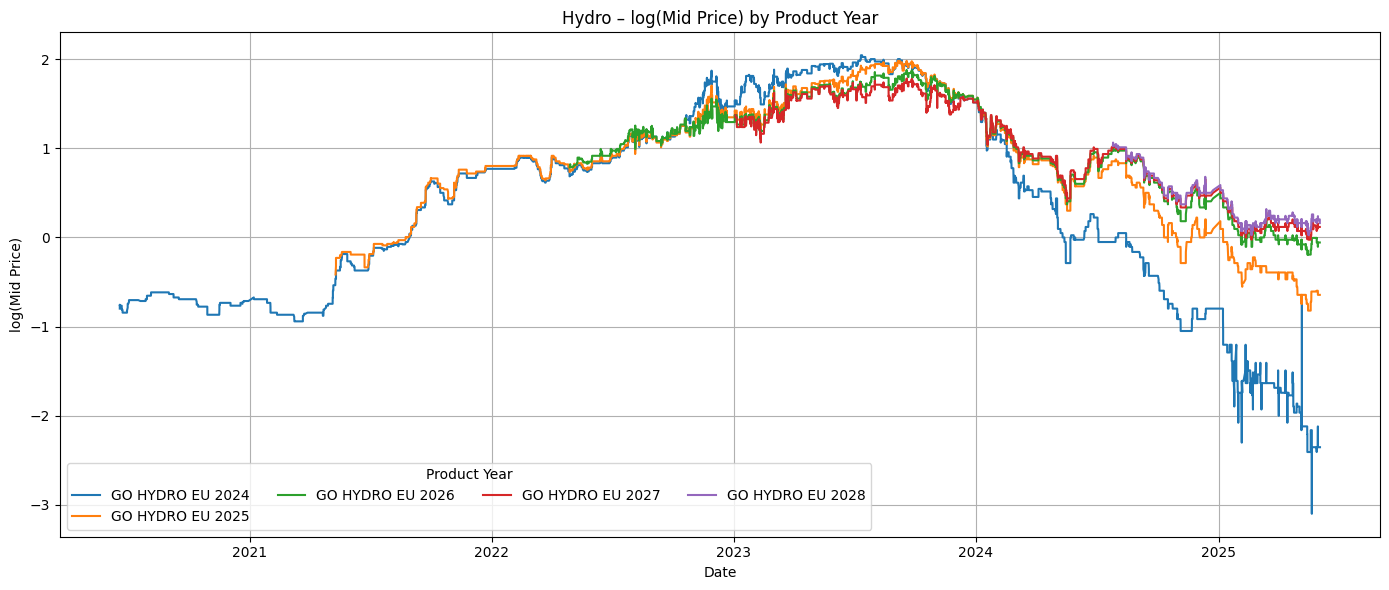

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

for (tech_type, year), df in split_data.items():
    if tech_type.lower() == "hydro":
        date_col = "Modified on" if "Modified on" in df.columns else "date"
        plt.plot(df[date_col], df["log_mid"], label=str(year))

plt.title("Hydro – log(Mid Price) by Product Year")
plt.xlabel("Date")
plt.ylabel("log(Mid Price)")
plt.legend(title="Product Year", ncol=4)   # tweak ncol if many years
plt.grid(True)
plt.tight_layout()
plt.show()


In [94]:
def adf_report(series, name):
    """Augmented Dickey–Fuller summary with nice printouts."""
    series = series.dropna()
    adf_stat, pval, _, _, crit, _ = adfuller(series)
    print(f"ADF test | {name}: statistic={adf_stat:6.3f}, p-value={pval:6.4f}")
    for k, v in crit.items():
        print(f"    crit. value {k}: {v:6.3f}")
    print("⇒ Stationary" if pval < 0.05 else "⇒ Non-stationary", end="\n\n")

# hydro 2028 mid_price log
df = split_data[('hydro', 'GO HYDRO EU 2024')].copy()

df['Modified on'] = (
    pd.to_datetime(df['Modified on'], utc=True, errors='coerce')
      .dt.tz_localize(None)          
)

df = df.set_index('Modified on').sort_index()     

hydro_2028_log = df['log_mid'].dropna()

hydro_2028 = split_data[('hydro', 'GO HYDRO EU 2028')]['log_mid']
adf_report(hydro_2028, "Hydro-2028 log price")

ADF test | Hydro-2028 log price: statistic=-2.418, p-value=0.1368
    crit. value 1%: -3.436
    crit. value 5%: -2.864
    crit. value 10%: -2.568
⇒ Non-stationary



In [95]:
split_data[('hydro', 'GO HYDRO EU 2024')]

,Modified on,Product code,Bid,Ask,Mid price,Currency,log_mid
0,2020-06-19 11:18:50+02:00,GO HYDRO EU 2024,0.40,0.50,0.450,EUR,-0.798508
1,2020-06-19 11:21:12+02:00,GO HYDRO EU 2024,0.44,0.50,0.470,EUR,-0.755023
2,2020-06-19 11:21:15+02:00,GO HYDRO EU 2024,0.44,0.49,0.465,EUR,-0.765718
3,2020-06-22 08:32:00+02:00,GO HYDRO EU 2024,0.44,0.49,0.465,EUR,-0.765718
4,2020-06-22 08:32:00+02:00,GO HYDRO EU 2024,0.44,0.49,0.465,EUR,-0.765718
...,...,...,...,...,...,...,...
3749,2025-06-02 08:59:47+02:00,GO HYDRO EU 2024,0.07,0.12,0.095,EUR,-2.353878
3750,2025-06-02 09:30:29+02:00,GO HYDRO EU 2024,0.07,0.12,0.095,EUR,-2.353878
3751,2025-06-02 09:43:25+02:00,GO HYDRO EU 2024,0.07,0.12,0.095,EUR,-2.353878
3752,2025-06-02 09:50:22+02:00,GO HYDRO EU 2024,0.07,0.12,0.095,EUR,-2.353878


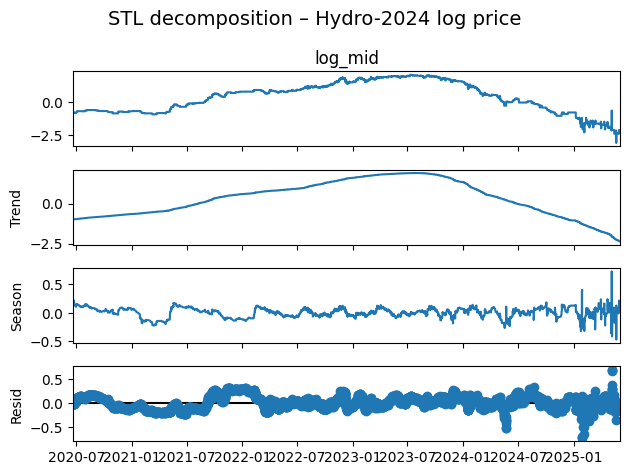

In [96]:
stl = STL(hydro_2028_log.dropna(), period=365)               
res  = stl.fit()
fig  = res.plot()
fig.suptitle('STL decomposition – Hydro-2024 log price', fontsize=14)
plt.tight_layout()
plt.show()

In [98]:
def stationarity_tests(series):
    """Return (ADF-p, KPSS-p). Use p<0.05 ⇒ reject null."""
    series = series.dropna()
    adf_p  = adfuller(series, autolag="AIC")[1]
    kpss_p = kpss(series, nlags="auto")[1]
    return adf_p, kpss_p

rows = []
for (tech, yr), df in split_data.items():
    if tech.lower() != "hydro":
        continue

    # put datetime on the index defensively
    s = df.copy()
    s['Modified on'] = (
        pd.to_datetime(s['Modified on'], utc=True, errors='coerce')
          .dt.tz_localize(None)
    )
    s = s.set_index('Modified on').sort_index()

    log_mid  = s['log_mid']
    returns  = log_mid.diff()

    rows.append({
        "Product": yr,
        "ADF p-log(level)":  stationarity_tests(log_mid)[0],
        "KPSS p-log(level)": stationarity_tests(log_mid)[1],
        "ADF p-return":      stationarity_tests(returns)[0],
        "KPSS p-return":     stationarity_tests(returns)[1],
    })

pd.DataFrame(rows).set_index("Product").round(4)

C:\Users\esurujiu\AppData\Local\Temp\ipykernel_16436\1476585678.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p = kpss(series, nlags="auto")[1]
C:\Users\esurujiu\AppData\Local\Temp\ipykernel_16436\1476585678.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p = kpss(series, nlags="auto")[1]
C:\Users\esurujiu\AppData\Local\Temp\ipykernel_16436\1476585678.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_p = kpss(series, nlags="auto")[1]
C:\Users\esurujiu\AppData\Local\Temp\ipykernel_16436\1476585678.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
lo

,ADF p-log(level),KPSS p-log(level),ADF p-return,KPSS p-return
Product,,,,
GO HYDRO EU 2024,0.9910,0.01,0.0,0.0100
GO HYDRO EU 2025,0.9240,0.01,0.0,0.0100
GO HYDRO EU 2026,0.9507,0.01,0.0,0.0371
GO HYDRO EU 2027,0.9120,0.01,0.0,0.1000
GO HYDRO EU 2028,0.1368,0.01,0.0,0.1000


In [103]:
def extract_year(product_code: str) -> int:
    """
    Pulls the trailing 4-digit year from strings like 'GO HYDRO EU 2025'.
    Adjust the regex if your naming is different.
    """
    m = re.search(r'(\d{4})$', product_code)
    if m:
        return int(m.group(1))
    raise ValueError(f"Cannot parse year from {product_code}")

# ----- build the synthetic spot series -----------------------------------
spot_parts = []

for (tech, code), df in split_data.items():
    if tech.lower() != "hydro":
        continue                           # skip wind/solar/etc.

    year = extract_year(code)

    # clean timestamp -> naive datetime index
    tmp = df.copy()
    tmp['Modified on'] = (
        pd.to_datetime(tmp['Modified on'], utc=True, errors='coerce')
          .dt.tz_localize(None)
    )
    tmp = tmp.set_index('Modified on').sort_index()

    # keep only rows that belong to that calendar year
    slice_year = tmp.loc[tmp.index.year == year, ['log_mid']]
    slice_year['vintage'] = year          # optional: track source vintage
    spot_parts.append(slice_year)

# concatenate and sort in case years overlap
spot_df = pd.concat(spot_parts).sort_index()

# ----- derive log-returns for modelling ----------------------------------
spot_df['ret_mid'] = spot_df['log_mid'].diff()

spot_df


,log_mid,vintage,ret_mid
Modified on,,,
2024-01-02 08:11:58,1.515127,2024,NaN
2024-01-03 08:10:59,1.515127,2024,0.000000
2024-01-03 09:14:39,1.509618,2024,-0.005510
2024-01-03 09:58:04,1.504077,2024,-0.005540
2024-01-03 09:58:12,1.498506,2024,-0.005571
...,...,...,...
2025-05-30 09:58:24,-0.644357,2025,-0.028171
2025-06-02 06:46:39,-0.644357,2025,0.000000
2025-06-02 06:46:45,-0.644357,2025,0.000000
